# Lesson 4: Advanced Geography

In [1]:
import censusdis.data as ced
import censusdis.maps as cem

from censusdis.datasets import ACS5

import censusdis.states as states
from censusdis.places.washington import TACOMA_CITY

from censusdis import CensusApiException

Recall from [Lesson 2: Maps and More Geographies](./Lesson%202%20Maps.ipynb) that some geograpies are on-spine
and others are off-spine.

<img src="../images/census_geos.png" alt="Census Geographies" width="800"/>

## Can we combine on- and off-spine geometries?

What are all the census tracts in Tacoma, WA (a place)? It seems like a reasonable
question but the geography hierarchy does not technically allow it to be asked.

In [2]:
try:
    df_tacoma_tracts = ced.download(
        dataset=ACS5,
        vintage=2020,
        download_variables=["NAME"],
        state=states.WA,
        place=TACOMA_CITY,
        tract="*",
    )
except CensusApiException as e:
    print("We caught an exception!", e)

We caught an exception! Unable to match the geography specification {'state': '53', 'place': '70000', 'tract': '*'}.
Supported geographies for dataset='acs/acs5' in year=2020 are:
['us']
['region']
['division']
['state']
['state', 'county']
['state', 'county', 'county_subdivision']
['state', 'county', 'county_subdivision', 'subminor_civil_division']
['state', 'county', 'county_subdivision', 'place_remainder_or_part']
['state', 'county', 'tract']
['state', 'county', 'tract', 'block_group']
['state', 'place', 'county_or_part']
['state', 'place']
['state', 'consolidated_city']
['state', 'consolidated_city', 'place_or_part']
['state', 'alaska_native_regional_corporation']
['american_indian_area_alaska_native_area_hawaiian_home_land']
['american_indian_area_alaska_native_area_hawaiian_home_land', 'tribal_subdivision_remainder']
['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only']
['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land']
['amer

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## We can get all tracts in the state, and the whole of Tacoma

But we can't get just the tracts in Tacoma.

In [3]:
gdf_wa_tracts = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.WA,
    tract="*",
)

gdf_tacoma = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.WA,
    place=TACOMA_CITY,
)

In [4]:
gdf_wa_tracts

STATE COUNTY   TRACT                                               NAME  \
0       53    003  960100       Census Tract 9601, Asotin County, Washington   
1       53    003  960200       Census Tract 9602, Asotin County, Washington   
2       53    003  960300       Census Tract 9603, Asotin County, Washington   
3       53    003  960400       Census Tract 9604, Asotin County, Washington   
4       53    003  960500       Census Tract 9605, Asotin County, Washington   
...    ...    ...     ...                                                ...   
1779    53    061  053604  Census Tract 536.04, Snohomish County, Washington   
1780    53    061  053605  Census Tract 536.05, Snohomish County, Washington   
1781    53    061  053606  Census Tract 536.06, Snohomish County, Washington   
1782    53    061  053700     Census Tract 537, Snohomish County, Washington   
1783    53    061  053801  Census Tract 538.01, Snohomish County, Washington   

                                               geometry  
0     POLYGON ((-117.47999 46.12199, -117.42214 46.1...  
1     POLYGON ((-117.42077 46.33866, -117.41933 46.3...  
2     POLYGON ((-117.07220 46.42472, -117.06837 46.4...  
3     POLYGON ((-117.07964 46.41444, -117.07596 46.4...  
4     POLYGON ((-117.05936 46.40209, -117.05865 46.4...  
...                                                 ...  
1779  POLYGON ((-122.06513 48.08992, -122.06464 48.0...  
1780  POLYGON ((-122.01041 47.99896, -122.01051 48.0...  
1781  POLYGON ((-121.97267 47.98226, -121.96928 47.9...  
1782  POLYGON ((-121.97133 48.22253, -121.96120 48.2...  
1783  POLYGON ((-122.04685 47.83137, -122.04406 47.8...  

[1784 rows x 5 columns]

In [5]:
gdf_tacoma

STATE  PLACE                     NAME  \
0    53  70000  Tacoma city, Washington   

                                            geometry  
0  MULTIPOLYGON (((-122.51391 47.22827, -122.5095...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Spatial Intersection

**Note:** "All tracts in Tacoma," is an imperfectly defined problem, since some tracts might
not be entirely inside or outside a place.

We can get a reasonable solution to the problem by asking, "What tracts intersect with Tacoma?"

Implementation can be complicated:

- Computational geometry with floating point is notoriously finicky. What about intersection
  just at the boundaries? Or slivers created by round-off error?
  - Intersection doesn't quite work.
  - Containment doesn't quite work.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Illustrating some of the issues

### Intersection

In [6]:
gdf_intersect = gdf_wa_tracts.sjoin(gdf_tacoma)

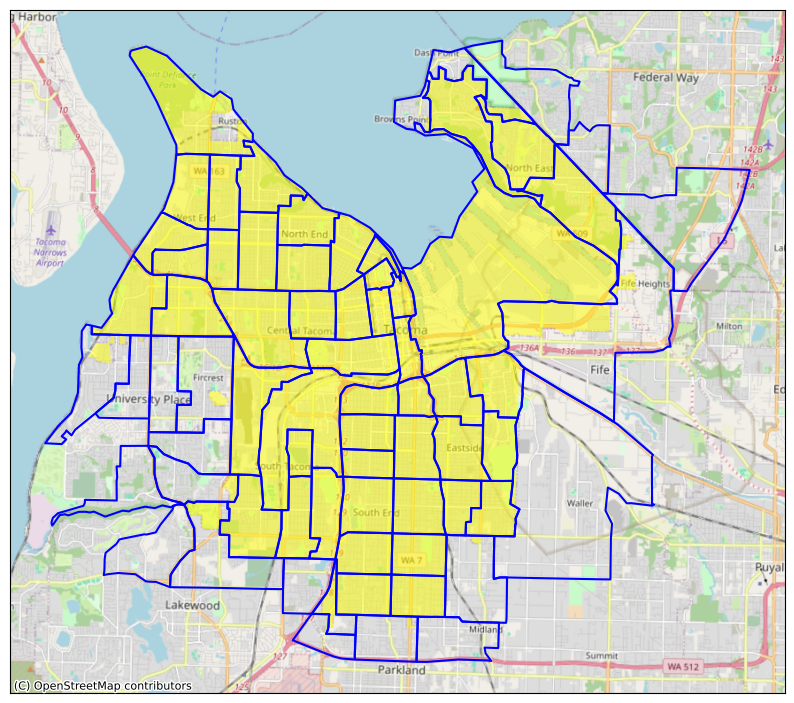

In [7]:
ax = cem.plot_map(gdf_tacoma, color="yellow", alpha=0.5, figsize=(10, 10))

ax = cem.plot_map(
    gdf_intersect.boundary,
    color="blue",
    with_background=True,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Contained Entirely Within

In [8]:
gdf_within = gdf_wa_tracts.sjoin(gdf_tacoma, predicate="within")

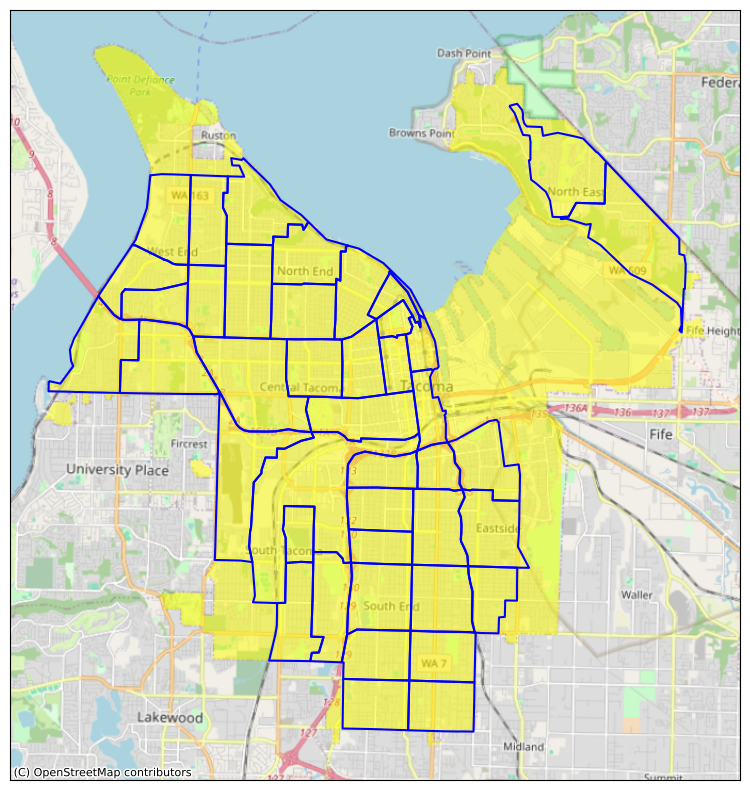

In [9]:
ax = cem.plot_map(gdf_tacoma, color="yellow", alpha=0.5, figsize=(10, 10))

ax = cem.plot_map(
    gdf_within.boundary,
    color="blue",
    with_background=True,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### What about partial containment?

For example, "all tracts of which more than 80% of their area is in Tacoma?"

This is doable, but the devil is in the details:

- `with_geometry=True` returns geometry in lattitude and longitude.
- We need to project to meters (or feet) to properly compute area.
- The most accurate projection depends on where we are. Alaska and Florida are very different.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## `ced.contained_within`

A flexible API that handles all the details for us.

In [10]:
# We want tracts in Tacoma

gdf_tacoma_tracts = ced.contained_within(
    # The containing geometry:
    state=states.WA,
    place=TACOMA_CITY,
).download(
    # Normal `ced.download` args. But only return those in Tacoma.
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.WA,
    tract="*",
)

In [11]:
gdf_tacoma_tracts.head()

STATE  PLACE COUNTY   TRACT                                         NAME  \
0    53  70000    053  060200  Census Tract 602, Pierce County, Washington   
1    53  70000    053  060300  Census Tract 603, Pierce County, Washington   
2    53  70000    053  060400  Census Tract 604, Pierce County, Washington   
3    53  70000    053  060500  Census Tract 605, Pierce County, Washington   
4    53  70000    053  060600  Census Tract 606, Pierce County, Washington   

                                            geometry  
0  POLYGON ((-122.43989 47.26200, -122.43759 47.2...  
1  POLYGON ((-122.54741 47.31773, -122.54134 47.3...  
2  POLYGON ((-122.50514 47.28527, -122.50511 47.2...  
3  POLYGON ((-122.48888 47.27199, -122.48883 47.2...  
4  POLYGON ((-122.46833 47.25722, -122.46817 47.2...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### `ced.contained_within` results

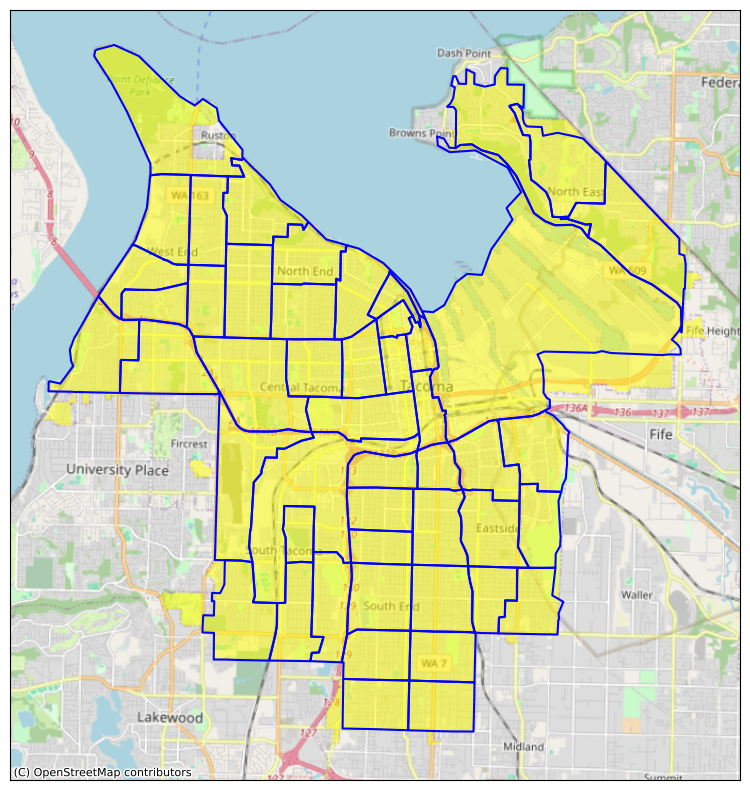

In [12]:
ax = cem.plot_map(gdf_tacoma, color="yellow", alpha=0.5, figsize=(10, 10))

ax = cem.plot_map(
    gdf_tacoma_tracts.boundary,
    color="blue",
    with_background=True,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Fine-tuning the results

This can be a little bit of an art.

In [13]:
gdf_tacoma_tracts_10 = ced.contained_within(
    state=states.WA,
    place=TACOMA_CITY,
    # Area threshold. Accept any tract that is more than 10% in Tacoma.
    area_threshold=0.10,
).download(
    # Normal `ced.download` args. But only return those in Tacoma.
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.WA,
    tract="*",
)

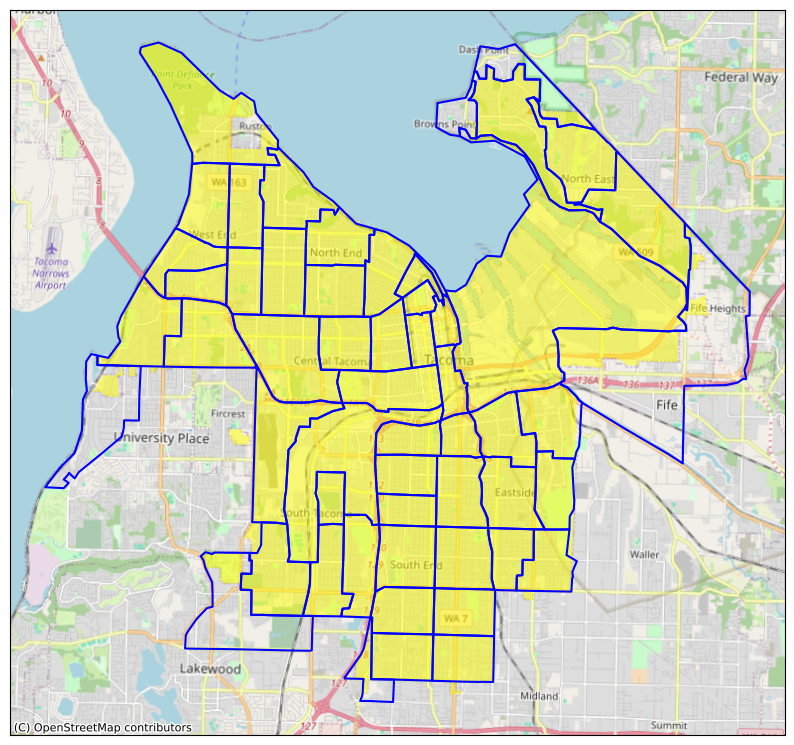

In [14]:
ax = cem.plot_map(gdf_tacoma, color="yellow", alpha=0.5, figsize=(10, 10))

ax = cem.plot_map(
    gdf_tacoma_tracts_10.boundary,
    color="blue",
    with_background=True,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Example 2: Urban Tracts in Illinois

In this example, we want to get all the census tracts that are in *any*
Combined Statistical Area (CSA) in the state of Illinois.

In [15]:
gdf_il_urban_tracts = ced.contained_within(
    # Must be in a CSA, but it can be any CSA in the country.
    combined_statistical_area="*"
).download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    # Must be in IL
    state=states.IL,
    # Can be any tract.
    tract="*",
    with_geometry=True,
)

In [16]:
gdf_il_urban_tracts.head()

COMBINED_STATISTICAL_AREA STATE COUNTY   TRACT  \
0                       176    17    031  251000   
1                       176    17    031  251100   
2                       176    17    031  251200   
3                       176    17    031  251300   
4                       176    17    031  251400   

                                       NAME  \
0  Census Tract 2510, Cook County, Illinois   
1  Census Tract 2511, Cook County, Illinois   
2  Census Tract 2512, Cook County, Illinois   
3  Census Tract 2513, Cook County, Illinois   
4  Census Tract 2514, Cook County, Illinois   

                                            geometry  
0  POLYGON ((-87.74842 41.90233, -87.74658 41.902...  
1  POLYGON ((-87.75577 41.90225, -87.75333 41.902...  
2  POLYGON ((-87.76565 41.90214, -87.76382 41.902...  
3  POLYGON ((-87.77536 41.90200, -87.77294 41.902...  
4  POLYGON ((-87.77513 41.89471, -87.77229 41.894...

In [17]:
# Get the outline of the whole state for mapping purposes.
gdf_il = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    state=states.IL,
    with_geometry=True,
)

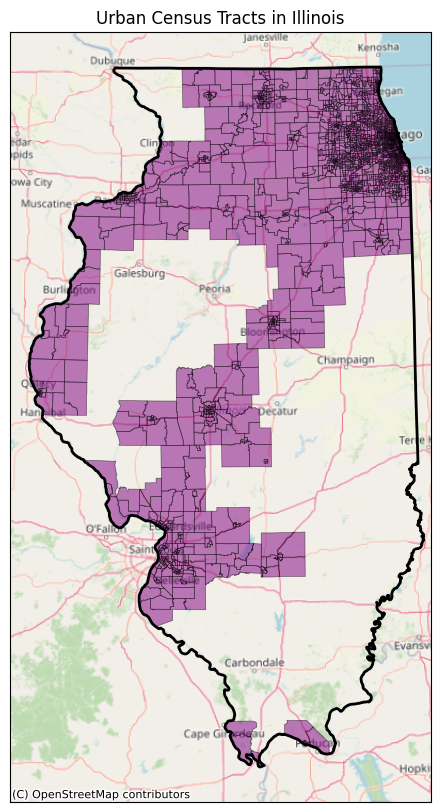

In [18]:
ax = cem.plot_map(
    gdf_il_urban_tracts,
    color="purple",
    edgecolor="black",
    linewidth=0.5,
    alpha=0.5,
    with_background=True,
    figsize=(6, 10),
)

ax = cem.plot_map(gdf_il.boundary, edgecolor="black", linewidth=2, ax=ax)

_ = ax.set_title("Urban Census Tracts in Illinois")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Example 3: Tracts in the New York CSA

In this example, we want to get all the census tracts that are in *any*
Combined Statistical Area (CSA) in the state of Illinois.

It looks simple, but as explained above, there is a lot of complexity
hidden under the hood.

In [19]:
from censusdis.csa import NEW_YORK_NEWARK_NY_NJ_CT_PA_CSA

In [20]:
VARIABLE_MEDIAN_INCOME = "B19013_001E"

In [21]:
%%time

gdf_csa_tract = ced.contained_within(
    combined_statistical_area=NEW_YORK_NEWARK_NY_NJ_CT_PA_CSA,
).download(
    ACS5,
    2020,
    [VARIABLE_MEDIAN_INCOME],
    with_geometry=True,
    state="*",
    tract="*",
)

CPU times: user 2.04 s, sys: 86 ms, total: 2.13 s
Wall time: 4.91 s


In [22]:
gdf_csa_tract.shape

(5777, 6)

In [23]:
gdf_csa_tract.head()

COMBINED_STATISTICAL_AREA STATE COUNTY   TRACT  B19013_001E  \
0                       408    09    001  010101     189219.0   
1                       408    09    001  010102     250001.0   
2                       408    09    001  010201     250001.0   
3                       408    09    001  010202     144766.0   
4                       408    09    001  010300     241827.0   

                                            geometry  
0  POLYGON ((-73.72777 41.10070, -73.71229 41.107...  
1  POLYGON ((-73.66985 41.12309, -73.66864 41.124...  
2  POLYGON ((-73.65501 41.06846, -73.65013 41.070...  
3  POLYGON ((-73.60704 41.05392, -73.60488 41.059...  
4  POLYGON ((-73.66336 41.04169, -73.66221 41.043...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Plot

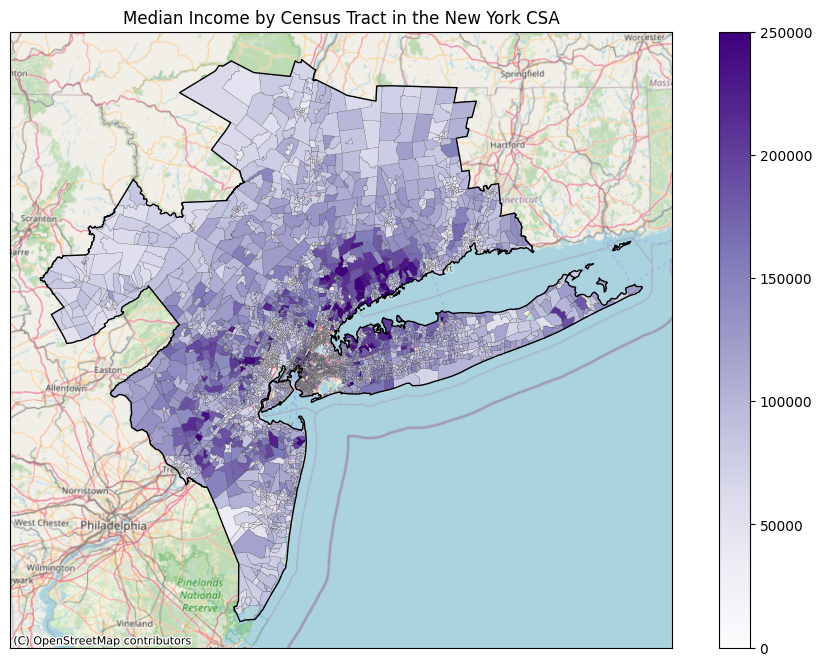

In [24]:
gdf_nyc_csa = ced.download(
    ACS5,
    2020,
    ["NAME"],
    combined_statistical_area=NEW_YORK_NEWARK_NY_NJ_CT_PA_CSA,
    with_geometry=True,
)

ax = cem.plot_map(
    gdf_csa_tract,
    VARIABLE_MEDIAN_INCOME,
    cmap="Purples",
    edgecolor="black",
    linewidth=0.1,
    vmin=0,
    legend=True,
    with_background=True,
    figsize=(12, 8),
)

ax = cem.plot_map(gdf_nyc_csa.boundary, color="black", linewidth=1.0, ax=ax)

_ = ax.set_title("Median Income by Census Tract in the New York CSA")